<a href="https://colab.research.google.com/github/CindyWedd/CindyWedd.github.io/blob/main/Copy_of_Learning_to_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### London data for employees from a company

In [4]:
#London data for employees

data = {
    'EmployeeID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack', 'Kim', 'Liam', 'Megan', 'Nathan', 'Olivia'],
    'Department': ['HR', 'Engineering', 'Engineering', 'HR', 'Finance', 'Sales', 'Sales', 'Engineering', 'HR', 'Finance', 'Sales', 'HR', 'Engineering', 'Sales', 'HR'],
    'JobTitle': ['Manager', 'Engineer', 'Engineer', 'Clerk', 'Analyst', 'Sales Rep', 'Sales Rep', 'Engineer', 'Clerk', 'Analyst', 'Sales Rep', 'Manager', 'Engineer', 'Sales Rep', 'Clerk'],
    'Salary': [75000, 95000, 80000, 50000, 60000, 70000, 72000, 85000, 52000, 62000, 75000, 77000, 80000, 73000, 54000],
    'HoursWorked': [40, 45, 40, 38, 42, 40, 38, 45, 39, 41, 42, 40, 44, 39, 38],
    'Bonus': [5000, 7000, 3000, 2000, 4000, 5000, 4000, 6000, 2500, 3000, 5500, 4500, 6000, 5000, 2500]
}

london = pd.DataFrame(data)

NameError: name 'pd' is not defined

### looking at the data to verify we have it read in

In [1]:
london.head(3)

NameError: name 'london' is not defined

So we have our data and its clean... because I made it. Other wise we would want to check it to be sure!

So we don't have to do any cleaning but we will transform it a bit to plot.

Here we are going to group our data by department.

In [ ]:
grouped_department = london.groupby('Department').agg({'Salary': 'sum'})
grouped_department = grouped_department.reset_index()
grouped_department = grouped_department.sort_values('Salary', ascending=False)
grouped_department

,Department,Salary
0,Engineering,340000
2,HR,308000
3,Sales,290000
1,Finance,122000


Now lets put together a plot to see our data. We will do a pie chart to see how dominant the salary spend is in each department.

In [2]:
grouped_department.plot(kind="pie", y='Salary');

NameError: name 'grouped_department' is not defined

So we have this plot looking at salaries and it doesnt really mean anything on its own.
- It's hard to gain and real insights other than 1 has the smallest salary.
- What are the the labels 0, 1, 2, 3?
- what 0, 2, 3 all look pretty similar in size are they really?





|    | Department   |   Salary |
|---:|:-------------|---------:|
|  0 | Engineering  |   340000 |
|  2 | HR           |   308000 |
|  3 | Sales        |   290000 |
|  1 | Finance      |   122000 | 



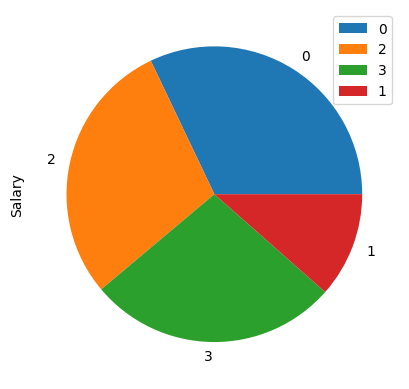

In [ ]:
print(grouped_department.to_markdown(), '\n')

grouped_department.plot(kind="pie", y='Salary');

With this example, we printed the table along with the plot. We can answer all the questions from above.

- Having to provide the table means we failed.

- It would be super awkward to have to reference two charts to get the full story.

In [5]:
grouped_department.plot(kind="pie", #use this to pick the plot type
                        y='Salary', #define what col to plot
                        labels=grouped_department['Department'], #defines the labels
                        title='Salary by Department London Office', #adds title to plot
                        autopct='%1.1f%%', #adds %'s into plot
                        legend=False); #removes legend

NameError: name 'grouped_department' is not defined

We now have a more readable pie plot that easily shows us where each department is in terms of salary spend as a whole. This is fine for that we might want to adjust the colors to make it more pleasing to look at. However it is now doing the job correctly. We get a story from the plot and its clear.

In [6]:
grouped_department.plot(
    kind='pie',
    y='Salary',
    labels=grouped_department['Department'],
    title='Salary by Department - London Office',
    legend=False,
    autopct='%1.1f%%',
    figsize=(4, 4), # defines the size of plot in inches
    colors=['#5D8AA8', '#4682B4', '#1E90FF', '#0000FF']);  #colors of the slices

NameError: name 'grouped_department' is not defined

We added the figsize to control the size of our plot. We also changed the colors to shades of blue. That way we are not fighting the viewer for attention with our slices. You will draw into blue as its darker but its not a hard on the eyes.

# matplotlib

Here we will move the plot to matplotlib.
- we have been just using pandas so far to make the plots
- pandas plot are a lite version of matplotlib
- we can do the same plot its just orginized a little different
- we can do so much more in matplotlib as it give many more options

In [7]:
# Data for the pie chart
labels = grouped_department['Department']
sizes = grouped_department['Salary']
colors = ['#5D8AA8', '#4682B4', '#1E90FF', '#0000FF']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=360,)

# Title and display the plot
plt.title('Salary by Department - London Office')
plt.show()


NameError: name 'grouped_department' is not defined

As we can see it's the same plot. The parametes to set it up is just a little more work but a bit easier to follow and customize as we see fit.

#### lets explode a section

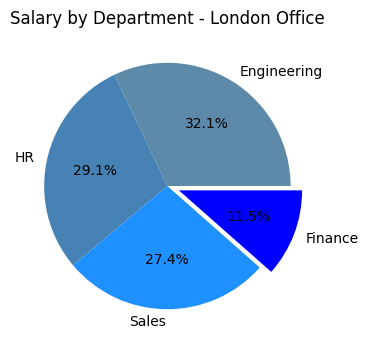

In [ ]:
# Data for the pie chart
labels = grouped_department['Department']
sizes = grouped_department['Salary']
colors = ['#5D8AA8', '#4682B4', '#1E90FF', '#0000FF']
explode = (0, 0, 0, 0.1)

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=360, explode=explode)

# Title and display the plot
plt.title('Salary by Department - London Office')
plt.show()

Lets play with it and dive in a bit more! Maybe You get tasked to make a similar plot but they need to see the employees in the Finance department. We will have to modify our code to do it below!

In [ ]:
# Grouping by 'Department' (excluding 'Finance') and summing 'Salary'
grouped_data = london[london['Department'] != 'Finance'].groupby('Department')['Salary'].sum().reset_index()

# Adding a 'Name' column with null values for the grouped data
grouped_data['Name'] = None

# Extracting Finance data as separate rows
finance_data = london[london['Department'] == 'Finance'][['Name', 'Department', 'Salary']]

# Concatenating the grouped data with the finance data
final_df = pd.concat([grouped_data, finance_data], ignore_index=True)

# Sorting by 'Department' to ensure the right order
final_df = final_df.sort_values(by='Department').reset_index(drop=True)

final_df

,Department,Salary,Name
0,Engineering,340000,None
1,Finance,60000,Eva
2,Finance,62000,Jack
3,HR,308000,None
4,Sales,290000,None


Below we will explore the power of the plotting packages and the ability to get really custom with our plot!

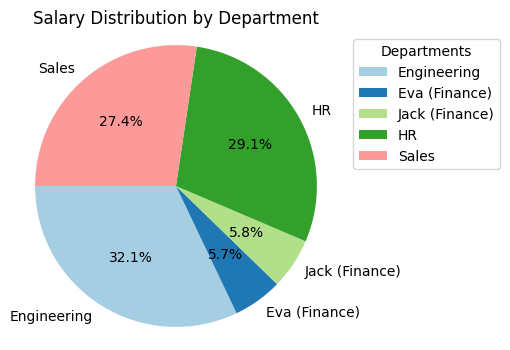

In [ ]:
# we are making some custom code to make the label display
# department and name when its the finance department
labels = [f"{name} ({department})" if department == 'Finance' else department
          for department, name in zip(final_df['Department'], final_df['Name'])]

sizes = final_df['Salary']

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors)
plt.legend(title="Departments", bbox_to_anchor=(1.05, 1), loc='best')
plt.title("Salary Distribution by Department")
plt.axis('equal')

plt.show()

We will customize it a bit more and make the other department shades of grey. Then make the Finance department blue and trace the employee slices so we can tell them apart, while being able to tell they are the same department.

In [9]:
# Define three custom greys (light, medium, dark)
grey_colors = ['#D3D3D3', '#A9A9A9', '#909090']

# Assign greys to non-Finance departments
colors = []
for department in final_df['Department']:
    if department == 'Finance':
        colors.append('blue')
    else:
        colors.append(grey_colors.pop(0))

# Define labels with name and department for Finance, just department for others
labels = [f"{name} ({department})" if department == 'Finance' else department
          for department, name in zip(final_df['Department'], final_df['Name'])]

sizes = final_df['Salary']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, colors=colors)

# Add a black trace only for Finance slices
for i, department in enumerate(final_df['Department']):
    if department == 'Finance':
        wedges[i].set_edgecolor('black')

# Customize text appearance
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set(weight='bold')

# Add legend and title
plt.legend(title="Departments", bbox_to_anchor=(1.05, 1), loc='best')
plt.title("Salary Distribution by Department")
plt.axis('equal')

plt.show()


NameError: name 'final_df' is not defined

In [8]:
grouped_data
# finance = final_df[final_df['Department'] == 'Finance']
# finance

NameError: name 'grouped_data' is not defined